In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carregando o dataset

In [ ]:
df_train = pd.read_csv('../data/clean_data/train.csv', sep=';')
df_val = pd.read_csv('../data/clean_data/val.csv', sep=';')
df_test = pd.read_csv('../data/clean_data/test.csv', sep=';')

In [3]:
df_train.columns

Index(['book_text_reviews_count', 'language_code', 'is_ebook', 'book_rating',
       'book_format', 'author_id', 'num_pages', 'publication_year', 'book_id',
       'book_ratings_count', 'book_title', 'book_genre', 'author_rating',
       'author_reviews_count', 'author_name', 'author_ratings_count'],
      dtype='object')

### Análise exploratória dos dados

#### Gêneros dos livros

In [4]:
# Limpando os valores da coluna de gênero
df_train['book_genre'] = df_train['book_genre'].str.split(',').str[0]
df_val['book_genre'] = df_val['book_genre'].str.split(',').str[0]
df_test['book_genre'] = df_test['book_genre'].str.split(',').str[0]

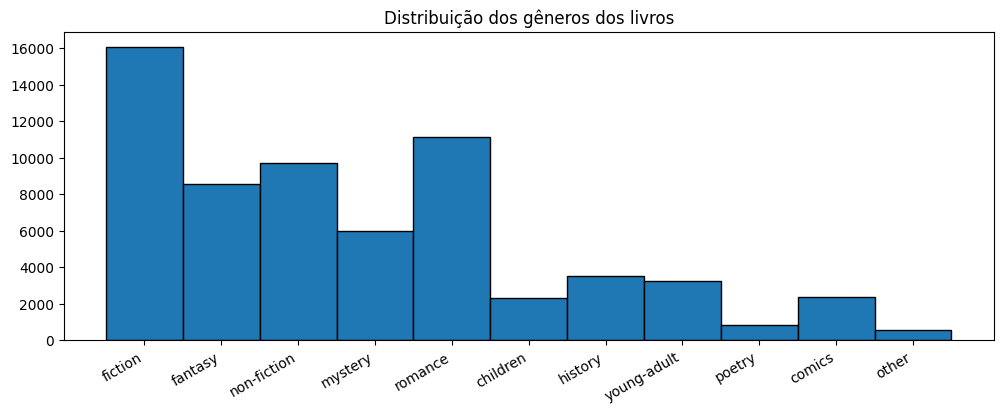

In [5]:
plt.figure(figsize=(12, 4))

_, bins, _ = plt.hist(df_train['book_genre'], bins=df_train['book_genre'].nunique(dropna=False), edgecolor='black', align='mid')
plt.title('Distribuição dos gêneros dos livros')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, rotation=30, ha='right')

plt.show()

Ao analisar a distribuição dos gêneros dos livros, pode-se perceber que os gêneros mais presentes são "ficção", "não-ficção" e "romance". Logo é interessante agrupar os outros gêneros menos comuns a fim de diminuir a complexidade do modelo que será criado.

In [6]:
# Agrupamento dos gêneros menos presentes na categoria "other"
df_train['book_genre'] = df_train['book_genre'].apply(
    lambda x: x if x in ['fiction', 'non-fiction', 'romance', 'fantasy', 'mystery', 'history'] else 'other'
)
df_val['book_genre'] = df_val['book_genre'].apply(
    lambda x: x if x in ['fiction', 'non-fiction', 'romance', 'fantasy', 'mystery', 'history'] else 'other'
)
df_test['book_genre'] = df_test['book_genre'].apply(
    lambda x: x if x in ['fiction', 'non-fiction', 'romance', 'fantasy', 'mystery', 'history'] else 'other'
)

Distribuição após o agrupamento

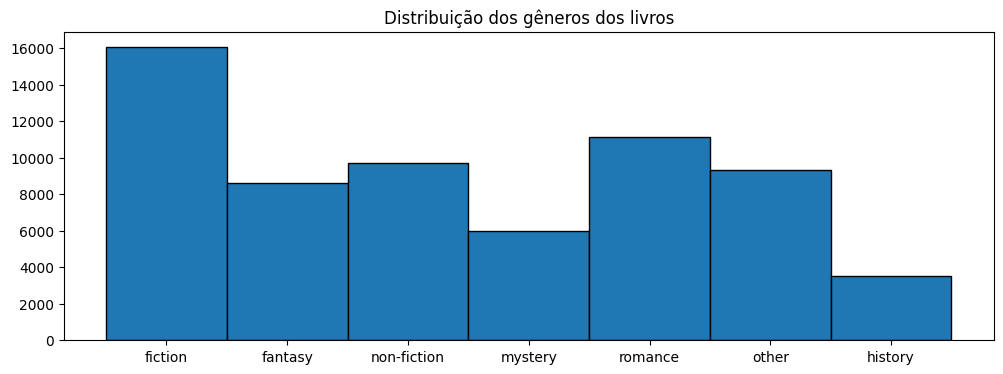

In [7]:
plt.figure(figsize=(12, 4))

_, bins, _ = plt.hist(df_train['book_genre'], bins=df_train['book_genre'].nunique(dropna=False), edgecolor='black', align='mid')
plt.title('Distribuição dos gêneros dos livros')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ha='center')

plt.show()

#### Idiomas dos livros

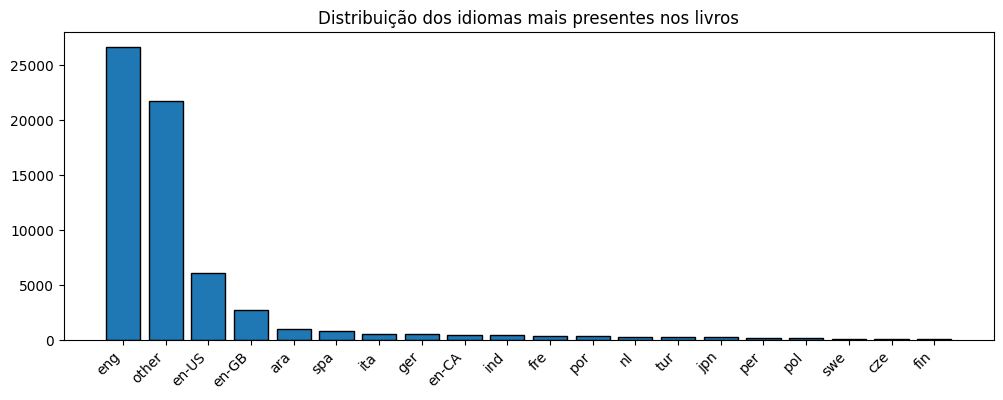

In [8]:

common_languages = df_train['language_code'].value_counts().nlargest(20)

plt.figure(figsize=(12, 4))
plt.bar(common_languages.index, common_languages.values, edgecolor='black')
plt.title('Distribuição dos idiomas mais presentes nos livros')
plt.xticks(rotation=45, ha='right')

plt.show()

Ao analisar a distribuição de linguagens dos livros, é perceptível que a lingua inglesa ('eng', 'en-US', 'en-GB', 'en-CA') é a mais frequente, portanto todas essas linguas inglesas serão agrupadas em uma mesma categoria, e as demais linguas serão agrupadas na categoria "other".

In [9]:
# Agrupamento das linguas inglesas e das demais linguas
df_train['language_code'] = df_train['language_code'].apply(
    lambda x: 'eng' if x in ['eng', 'en-US', 'en-GB', 'en-CA'] else 'other'
)
df_val['language_code'] = df_val['language_code'].apply(
    lambda x: 'eng' if x in ['eng', 'en-US', 'en-GB', 'en-CA'] else 'other'
)
df_test['language_code'] = df_test['language_code'].apply(
    lambda x: 'eng' if x in ['eng', 'en-US', 'en-GB', 'en-CA'] else 'other'
)

Distribuição após o agrupamento

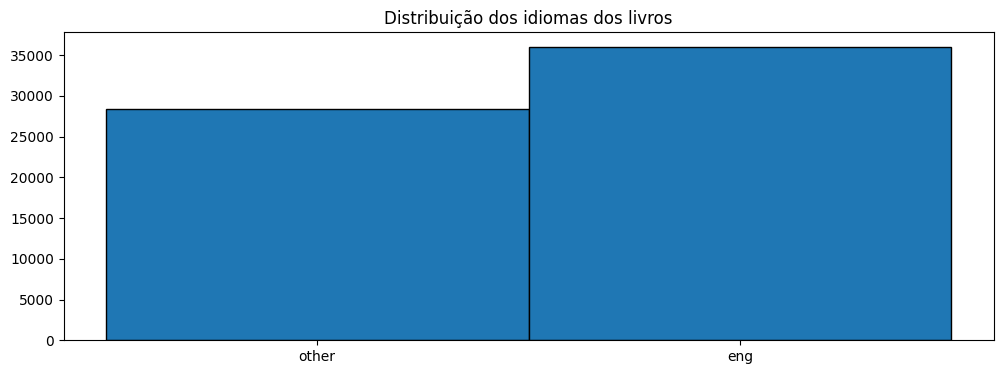

In [10]:
plt.figure(figsize=(12, 4))

_, bins, _ = plt.hist(df_train['language_code'], bins=df_train['language_code'].nunique(dropna=False), edgecolor='black', align='mid')
plt.title('Distribuição dos idiomas dos livros')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ha='center')

plt.show()

#### Formato dos livros

In [11]:
df_train['book_format'] = df_train['book_format'].str.replace(' ', '-')
df_val['book_format'] = df_val['book_format'].str.replace(' ', '-')
df_test['book_format'] = df_train['book_format'].str.replace(' ', '-')

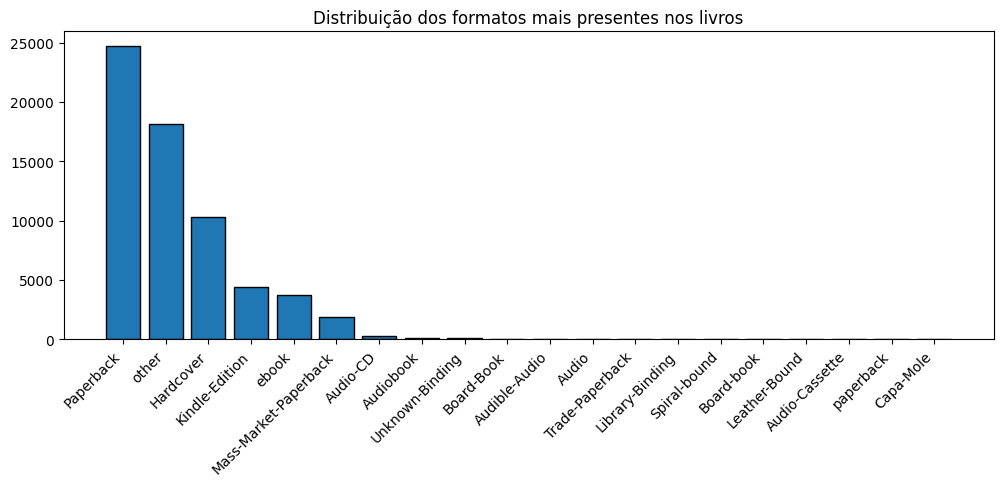

In [12]:

common_languages = df_train['book_format'].value_counts().nlargest(20)

plt.figure(figsize=(12, 4))
plt.bar(common_languages.index, common_languages.values, edgecolor='black')
plt.title('Distribuição dos formatos mais presentes nos livros')
plt.xticks(rotation=45, ha='right')

plt.show()

Ao analisar a distribuição dos formatos dos livros nota-se que livros de em "papel" são os mais frequentes, seguidos por livro de "capa dura" e por "outros". Portanto apenas essas 3 categorias serão mantidas, e todas as demais categorias serão agrupadas em "other".

In [13]:
# Agrupamento de todas as categorias em "other"
df_train['book_format'] = df_train['book_format'].apply(
    lambda x: x if x in ['Paperback', 'Hardcover', 'Kindle-Edition', 'ebook', 'Mass-Market-Paperback'] else 'other'
)
df_val['book_format'] = df_val['book_format'].apply(
    lambda x: x if x in ['Paperback', 'Hardcover', 'Kindle-Edition', 'ebook', 'Mass-Market-Paperback'] else 'other'
)
df_test['book_format'] = df_test['book_format'].apply(
    lambda x: x if x in ['Paperback', 'Hardcover', 'Kindle-Edition', 'ebook', 'Mass-Market-Paperback'] else 'other'
)

Distribuição após o agrupamento

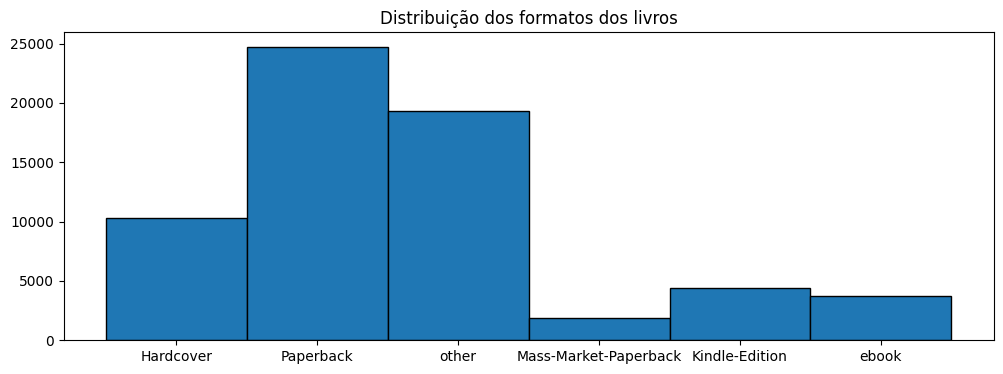

In [14]:
plt.figure(figsize=(12, 4))

_, bins, _ = plt.hist(df_train['book_format'], bins=df_train['book_format'].nunique(dropna=False), edgecolor='black', align='mid')
plt.title('Distribuição dos formatos dos livros')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ha='center')

plt.show()

#### Autores

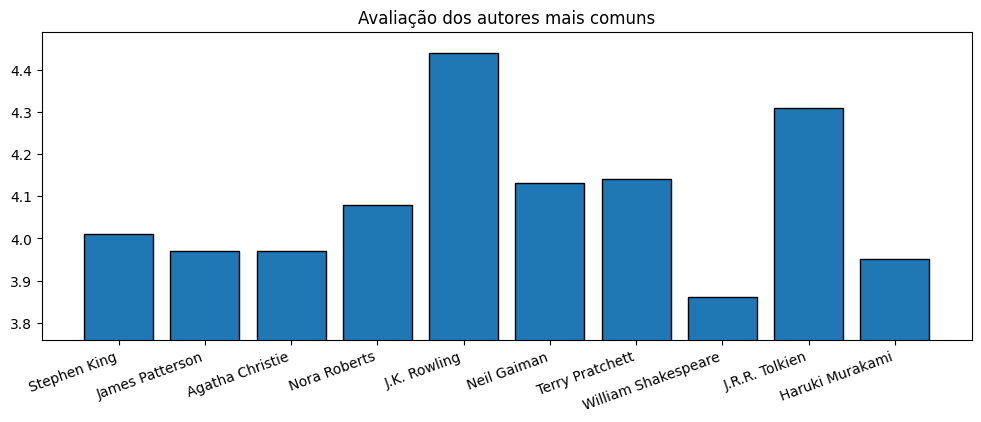

In [15]:
# Autores com maior quantidade de livros
df_common_authors = df_train['author_name'].value_counts().reset_index()
df_common_authors.columns = ['author_name', 'count']
df_common_authors = df_common_authors.nlargest(10, 'count')

df_common_authors = df_common_authors.merge(
    df_train[['author_name', 'author_rating']],
    on='author_name',
    how='left'
).drop_duplicates(subset='author_name')

# Plot
plt.figure(figsize=(12, 4))
plt.bar(df_common_authors['author_name'], df_common_authors['author_rating'], edgecolor='black')

plt.title('Avaliação dos autores mais comuns')
plt.ylim(df_common_authors['author_rating'].min() - 0.1, df_common_authors['author_rating'].max() + 0.05)
plt.xticks(rotation=20, ha='right')

plt.show()

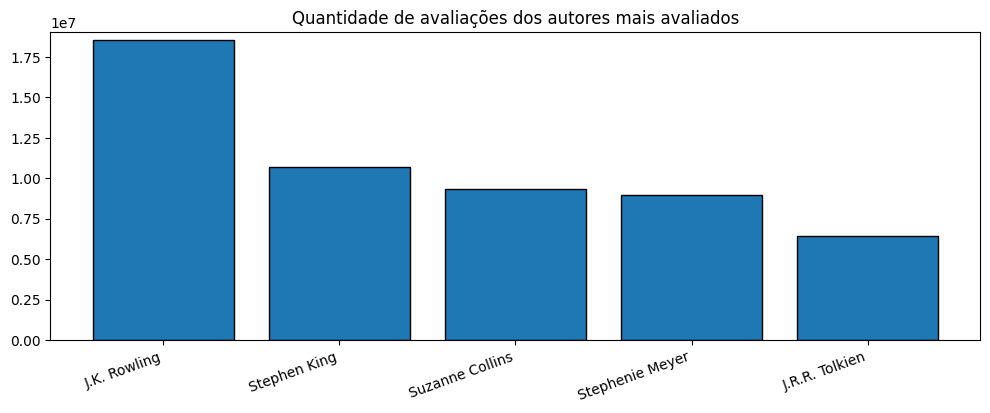

In [16]:
# Autores com maior número de avaliações
df_common_authors = df_train[['author_name', 'author_ratings_count']].drop_duplicates(subset='author_name')
df_common_authors = df_common_authors.nlargest(5, 'author_ratings_count')

# Plot
plt.figure(figsize=(12, 4))
plt.bar(df_common_authors['author_name'], df_common_authors['author_ratings_count'], edgecolor='black')

plt.title('Quantidade de avaliações dos autores mais avaliados')
plt.ylim(0, df_common_authors['author_ratings_count'].max() + 500000)
plt.xticks(rotation=20, ha='right')

plt.show()

#### Livros

In [17]:
# Livros melhores avaliados que possuem mais de 1000 avaliações
df_common_books = df_train[
    ['book_title', 'book_rating', 'book_ratings_count', 'author_name', 'book_genre']
].drop_duplicates(subset='book_title')

df_common_books = df_common_books[df_common_books['book_ratings_count'] > 1000]
df_common_books = df_common_books.nlargest(5, 'book_rating')

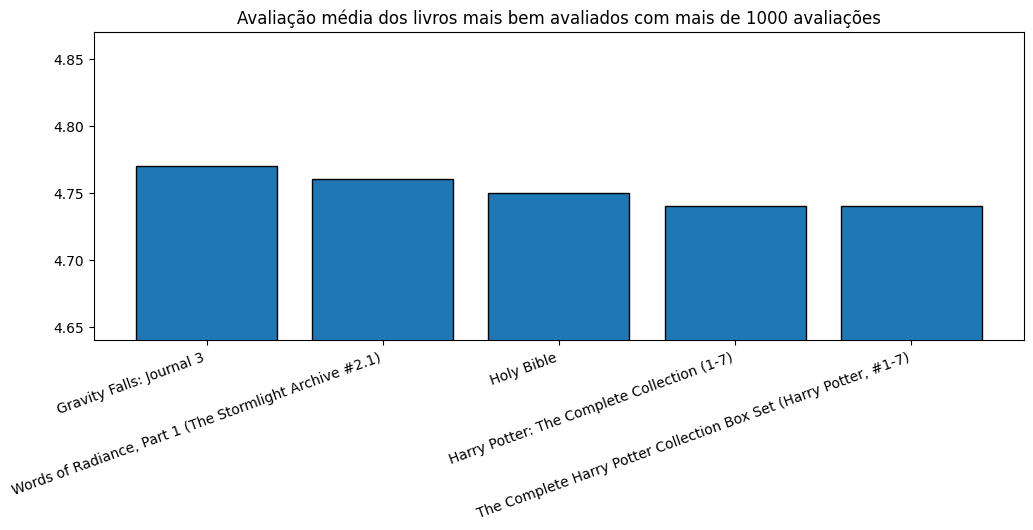

In [18]:
# Plot das avaliações dos 5 livros melhores avaliados
plt.figure(figsize=(12, 4))
plt.bar(df_common_books['book_title'], df_common_books['book_rating'], edgecolor='black')

plt.title('Avaliação média dos livros mais bem avaliados com mais de 1000 avaliações')
plt.ylim(df_common_books['book_rating'].min() - 0.1, df_common_books['book_rating'].max() + 0.1)
plt.xticks(rotation=20, ha='right')

plt.show()

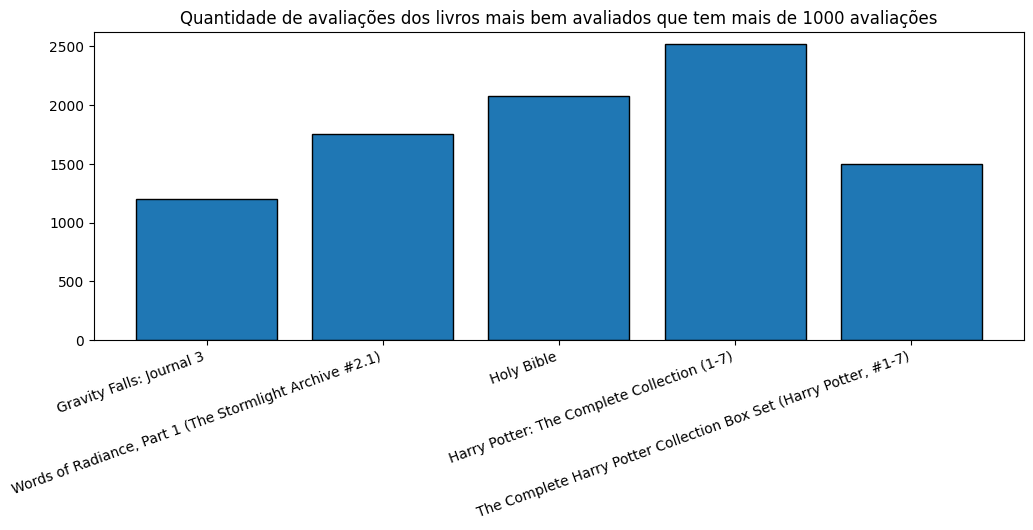

In [19]:
# Plot da quantidade de avaliações dos 5 livros melhores avaliados
plt.figure(figsize=(12, 4))
plt.bar(df_common_books['book_title'], df_common_books['book_ratings_count'], edgecolor='black')

plt.title('Quantidade de avaliações dos livros mais bem avaliados que tem mais de 1000 avaliações')
plt.ylim(0, df_common_books['book_ratings_count'].max() + 100)
plt.xticks(rotation=20, ha='right')

plt.show()

In [20]:
# Autor, Gênero e Avaliação dos 5 livros melhores avaliados
df_common_books[['book_title', 'book_genre', 'author_name', 'book_rating']]

,book_title,book_genre,author_name,book_rating
53582,Gravity Falls: Journal 3,fantasy,Alex Hirsch,4.77
24026,"Words of Radiance, Part 1 (The Stormlight Arch...",fantasy,Brandon Sanderson,4.76
44834,Holy Bible,non-fiction,Anonymous,4.75
38087,Harry Potter: The Complete Collection (1-7),fantasy,J.K. Rowling,4.74
46979,The Complete Harry Potter Collection Box Set (...,fantasy,J.K. Rowling,4.74


#### Avaliações dos usuários

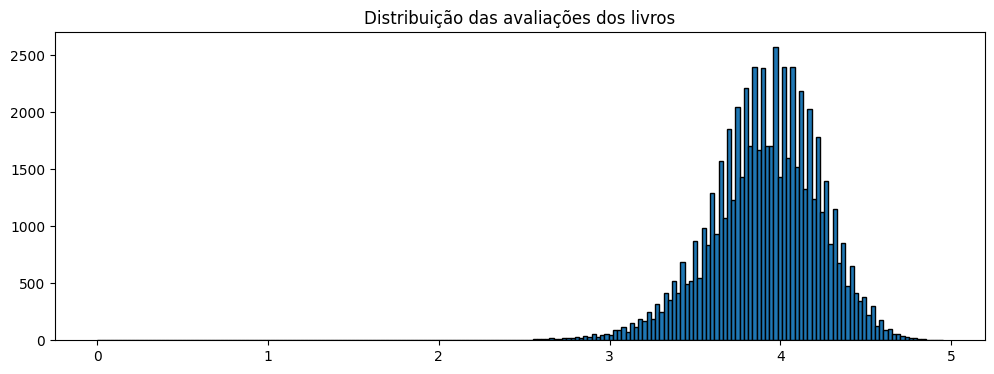

In [21]:
plt.figure(figsize=(12, 4))

plt.hist(df_train['book_rating'], bins=200, edgecolor='black', align='mid')
plt.title('Distribuição das avaliações dos livros')

plt.xticks([0, 1, 2, 3, 4, 5], rotation=0, ha='center')

plt.show()

Ao analisar a distribuição das avaliações, percebe-se um desbalanceamento significativo, o que pode impactar negativamente no desempenho do modelo que será criado. A presença de uma distribuição desigual da variável alvo pode levar a um viés durante a aprendizagem, resultando em um modelo menos eficiente e menos preciso, portanto é essencial realizar o balanceamento desses dados (esse balanceamento será realizado na etapa de preparação dos dados).

É importante destacar que esse balanceamento deve ser feito **apenas no conjunto de treinamento**, visto que o conjunto de testes deve refletir uma situação no mundo real, manter a distribuição original nos dados de teste garante que o modelo seja avaliado em um cenário realista, semelhante ao que foi observado na análise inicial.

### Salvando as alterações feitas no dataset

In [ ]:
df_train.to_csv('../data/cleaned_data/train.csv', index=False, sep=';', encoding='utf-8', header=True)
df_val.to_csv('../data/cleaned_data/val.csv', index=False, sep=';', encoding='utf-8', header=True)
df_test.to_csv('../data/cleaned_data/test.csv', index=False, sep=';', encoding='utf-8', header=True)